<a href="https://colab.research.google.com/github/aavila2020/Data_sci/blob/main/Adrian_Avila_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')) #defining GPU data 

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda')) #inputting Torch Tensor to the code for the GPU

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    #plotting stuff into code
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id #Allowing the code to understand what google slides are and the URL

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500) #get slides from google slides 
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device) # Load all images into code

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [4]:
url = "https://docs.google.com/presentation/d/1vEY7DxGRgsvvWrhNgfy76V6hh4_5C34Ujr3CaXbROak/edit#slide=id.g1af3da6a0bf_0_144" # MY google slides images imported into code so that all my images of Indoor Vs Outdoor Rock Climbing show up

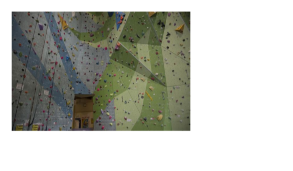

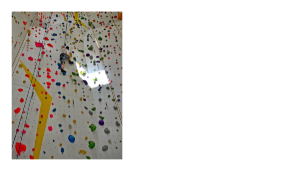

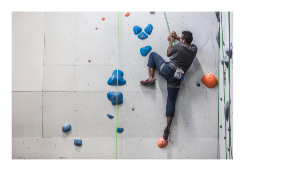

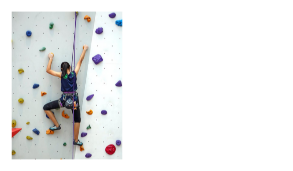

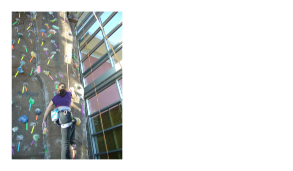

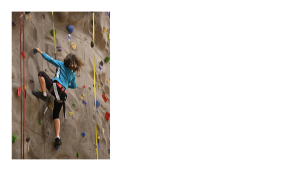

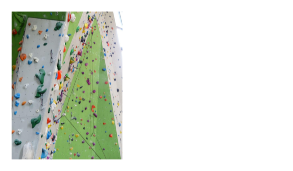

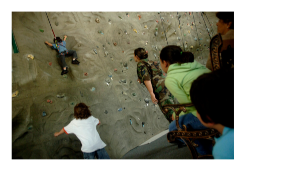

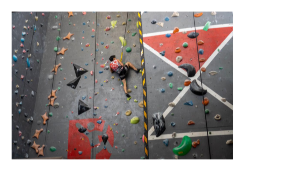

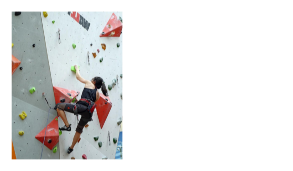

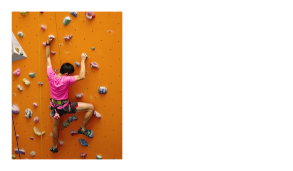

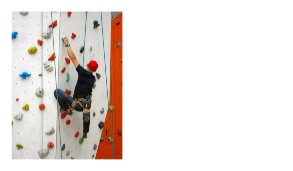

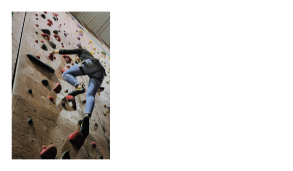

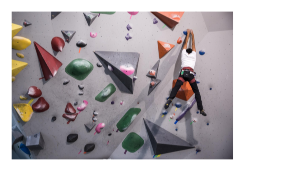

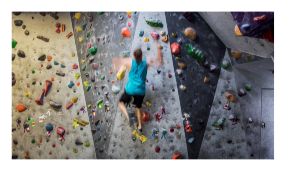

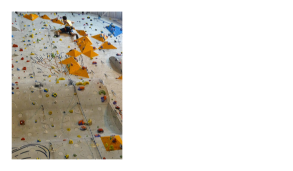

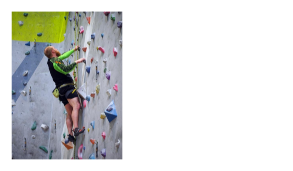

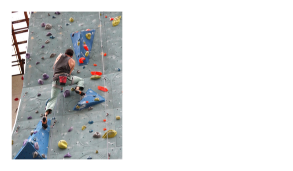

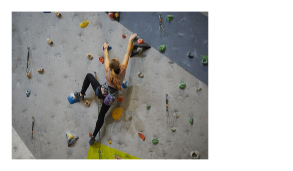

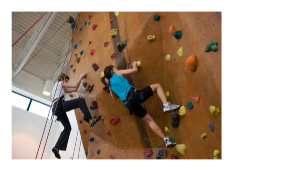

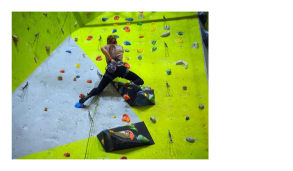

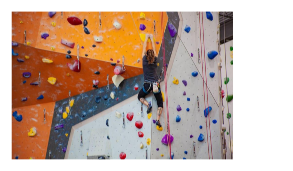

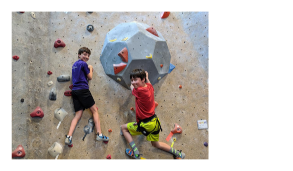

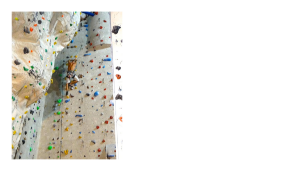

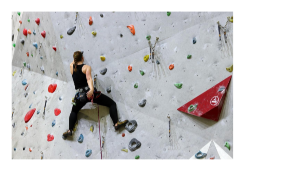

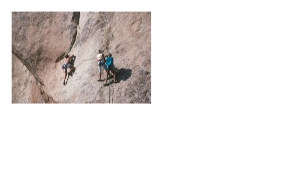

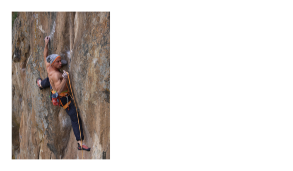

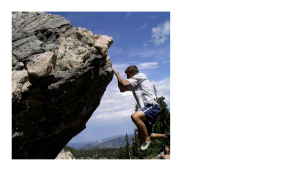

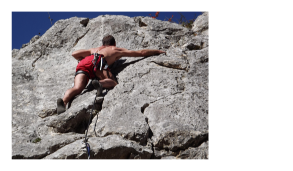

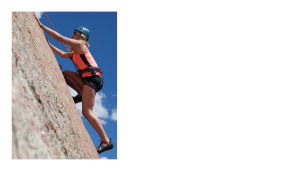

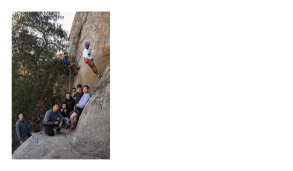

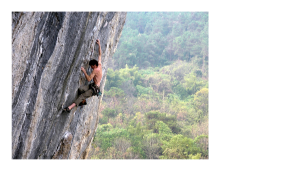

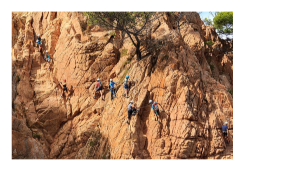

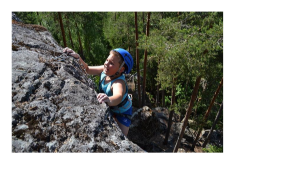

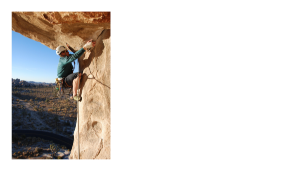

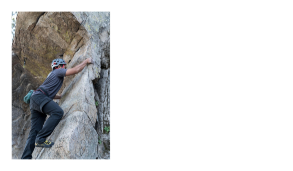

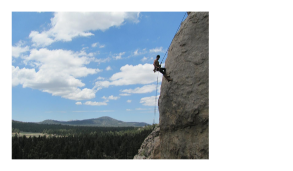

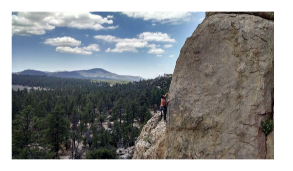

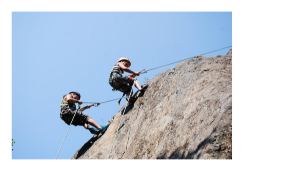

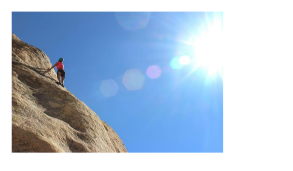

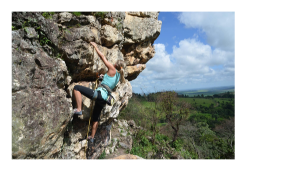

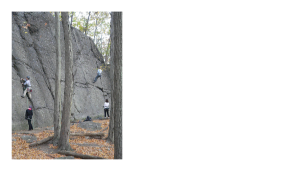

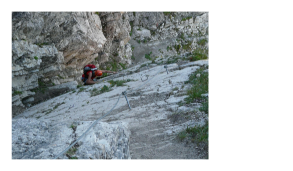

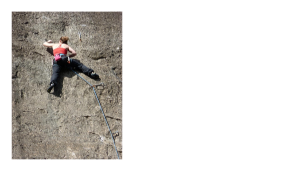

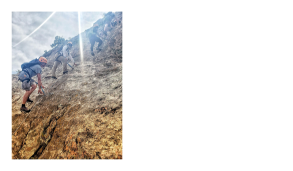

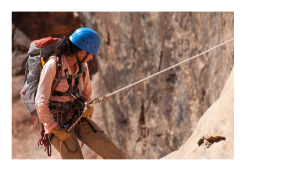

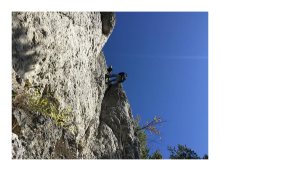

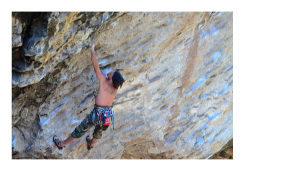

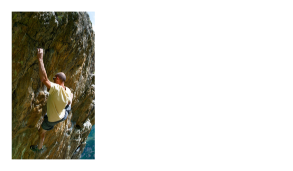

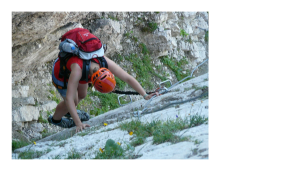

In [5]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images) #import images 

In [6]:
images.shape #Keeping all images the same size 

torch.Size([50, 3, 224, 224])

In [7]:
model(images) # modeling Images 

tensor([[-1.9371, -1.4623, -3.3413,  ..., -0.8459,  0.2988,  2.6701],
        [-1.3894, -1.4329, -2.8622,  ..., -2.7070,  2.9558,  3.4413],
        [-2.7337,  0.7003,  2.7035,  ..., -6.5152, -1.6903,  5.6205],
        ...,
        [ 0.9796,  0.9058, -0.8367,  ..., -2.7244,  1.8749, -2.4788],
        [ 0.6443, -3.0563, -1.9237,  ..., -1.3156,  1.6336, -0.2283],
        [ 0.5783,  0.0850,  0.9465,  ..., -4.1065,  2.3962, -2.1166]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images) # Y = Model Images 

In [9]:
y.shape # Y.shape 

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [11]:
for i in list(guesses):
    print(labels[i]) # print labels so that the code reads it

jigsaw puzzle
envelope
ski
pencil box, pencil case
crane
birdhouse
envelope
bathtub, bathing tub, bath, tub
hammer
ski
envelope
ski
totem pole
rubber eraser, rubber, pencil eraser
toyshop
web site, website, internet site, site
pajama, pyjama, pj's, jammies
envelope
paintbrush
toyshop
sleeping bag
tray
umbrella
jigsaw puzzle
pencil box, pencil case
ski
pedestal, plinth, footstall
cliff, drop, drop-off
cliff, drop, drop-off
balance beam, beam
totem pole
cliff, drop, drop-off
cliff, drop, drop-off
chain saw, chainsaw
rhinoceros beetle
fur coat
cliff, drop, drop-off
cliff, drop, drop-off
cliff, drop, drop-off
thatch, thatched roof
assault rifle, assault gun
obelisk
snowmobile
rhinoceros beetle
obelisk
ballplayer, baseball player
cliff, drop, drop-off
cliff dwelling
megalith, megalithic structure
chain saw, chainsaw


In [12]:
Y = np.zeros(50,)
Y[25:] = 1

In [13]:
Y # array of numbers that Y could be 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy() 

In [15]:
X.shape # shaping x into something specific 

(50, 1000)

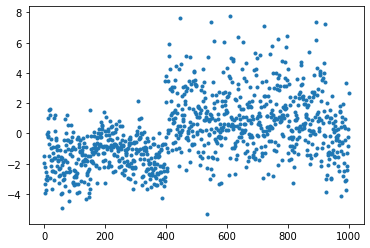

In [16]:
plt.plot(X[0],'.') # plotting X vs Y 

In [17]:
X[0]

array([-1.93708181e+00, -1.46227312e+00, -3.34134746e+00, -3.90783405e+00,
       -2.24527407e+00, -2.55725765e+00, -3.74529886e+00, -3.04231071e+00,
       -2.84716511e+00, -3.09413338e+00, -6.77065551e-02, -1.76464289e-01,
       -2.52008259e-01,  7.84501284e-02,  1.02089679e+00, -6.73294902e-01,
       -1.49439311e+00,  1.54929423e+00,  1.19926679e+00,  1.62604058e+00,
       -2.95706654e+00, -1.74741292e+00, -9.36757267e-01, -3.91426295e-01,
       -2.15348053e+00, -3.70262289e+00, -2.49014616e+00, -1.76503420e+00,
       -2.45210361e+00, -9.28328216e-01, -1.30390930e+00,  1.05109978e+00,
       -1.63179934e+00, -3.07639241e+00, -1.60695183e+00,  1.91564083e-01,
        1.19469786e+00, -2.56669521e+00, -3.12098354e-01, -9.22218561e-01,
       -4.60419118e-01, -2.18112755e+00, -1.07293856e+00, -8.18445444e-01,
       -1.49976087e+00, -1.85335016e+00, -7.99862385e-01, -1.74411213e+00,
       -2.83111238e+00, -3.26365280e+00, -2.31929660e+00, -1.11426234e+00,
       -2.31563354e+00, -

In [18]:
np.argmax(X[0]) #argmax = 611

611

In [19]:
labels[948] # label 948 is Granny Smith

'Granny Smith'

In [20]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [21]:
for i in top_ten:
    print(labels[i])

jigsaw puzzle
binder, ring-binder
wall clock
envelope
book jacket, dust cover, dust jacket, dust wrapper
pillow
sleeping bag
mailbag, postbag
rule, ruler
wallet, billfold, notecase, pocketbook


In [22]:
labels #999 different labels 

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  7.,  82., 179., 266., 224., 111.,  74.,  37.,  14.,   6.]),
 array([-5.321633  , -4.0148306 , -2.7080288 , -1.4012266 , -0.09442453,
         1.2123775 ,  2.5191796 ,  3.8259816 ,  5.132784  ,  6.4395857 ,
         7.746388  ], dtype=float32),
 <a list of 10 Patch objects>)

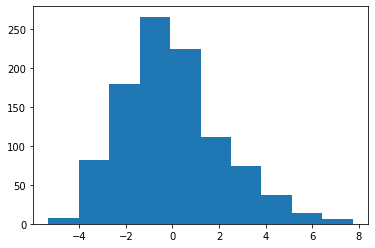

In [23]:
plt.hist(X[0]) # plotting the history of the code 

In [24]:
X = GPU_data(X) 
Y = GPU_data(Y)

In [25]:
def softmax(x): #softmax for the X axis 
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [26]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [27]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [28]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [29]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [30]:
X.shape

torch.Size([50, 1000])

In [31]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [32]:
def model(x,w): #model X vs W 

    return x@w[0]

In [33]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

In [ ]:
#BAD: First Run Was unsuccesful. Images did not show up after running 

In [ ]:
#GOOD: Third run was the best. All images loaded correctly and code worked fine

In [ ]:
#AVERAGE: Second Run was average. URL worked but after that nothing worked.